In [1]:
import sys,os
os.chdir('../../')
sys.path.append('./src/data')
sys.path.append('./src/events')
sys.path.append('./src/probability')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from subprocess import call
from IC.importer import *
from IC.processer import *
from IC.main import sim_events
from DC.event_processing import list_of_params_nsi
from functions import nufit_params_nsi
from src.plotter import P_over_E_parameter, nsi_oscillogram, nsi_flux_oscillogram, save, savethesis
from scipy.stats import chi2
import pickle
from multiprocessing import Pool
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 400
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')
np.set_printoptions(linewidth=200)

In [63]:
IC_range = np.logspace(np.log10(500),4,50)
DC_range = np.logspace(np.log10(5.6),np.log10(56),50)
all_range = np.logspace(np.log10(2),np.log10(3e3),500)

params = nufit_params_nsi.copy()

ett_params = list_of_params_nsi(params,[params['dm_31']],[params['theta_23']], [-4e-2,0],[0],[0],[0])[0]
emt_params = list_of_params_nsi(params,[params['dm_31']],[params['theta_23']], [0],[-1e-2,0],[0],[0])[0]
eem_params = list_of_params_nsi(params,[params['dm_31']],[params['theta_23']], [0],[0],[-1e-1,0],[0])[0]
eet_params = list_of_params_nsi(params,[params['dm_31']],[params['theta_23']], [0],[0],[0],[-1e-1,0])[0]
standard_params = [list_of_params_nsi(params,[params['dm_31']],[params['theta_23']], [0],[0],[0],[-1e-1,0])[1]]
zenith = -1
param_list = [emt_params,eem_params,eet_params]

In [64]:
#Pe_ett_anti = P_over_E_parameter('e',ett_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith)
#Pe_ett = P_over_E_parameter('e',ett_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith)

#Pe_emt_anti = P_over_E_parameter('e',emt_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith)
Pe_standard = P_over_E_parameter('e',standard_params,E=all_range, ndim=3, nsi=False, anti=False,zenith=zenith)
Pe = P_over_E_parameter('e',param_list,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith)

#Pm_ett_anti = P_over_E_parameter('m',ett_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith)
#Pm_ett = P_over_E_parameter('m',ett_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith)

#Pm_emt_anti = P_over_E_parameter('m',emt_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith)
Pm_standard = P_over_E_parameter('m',standard_params,E=all_range, ndim=3, nsi=False, anti=False,zenith=zenith)
Pm = P_over_E_parameter('m',param_list,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith)

#Pt_ett_anti = P_over_E_parameter('t',ett_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith)
#Pt_ett = P_over_E_parameter('t',ett_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith)

#Pt_emt_anti = P_over_E_parameter('t',emt_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith)
Pt_standard = P_over_E_parameter('t',standard_params,E=all_range, ndim=3, nsi=False, anti=False,zenith=zenith)
Pt = P_over_E_parameter('t',param_list,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith)


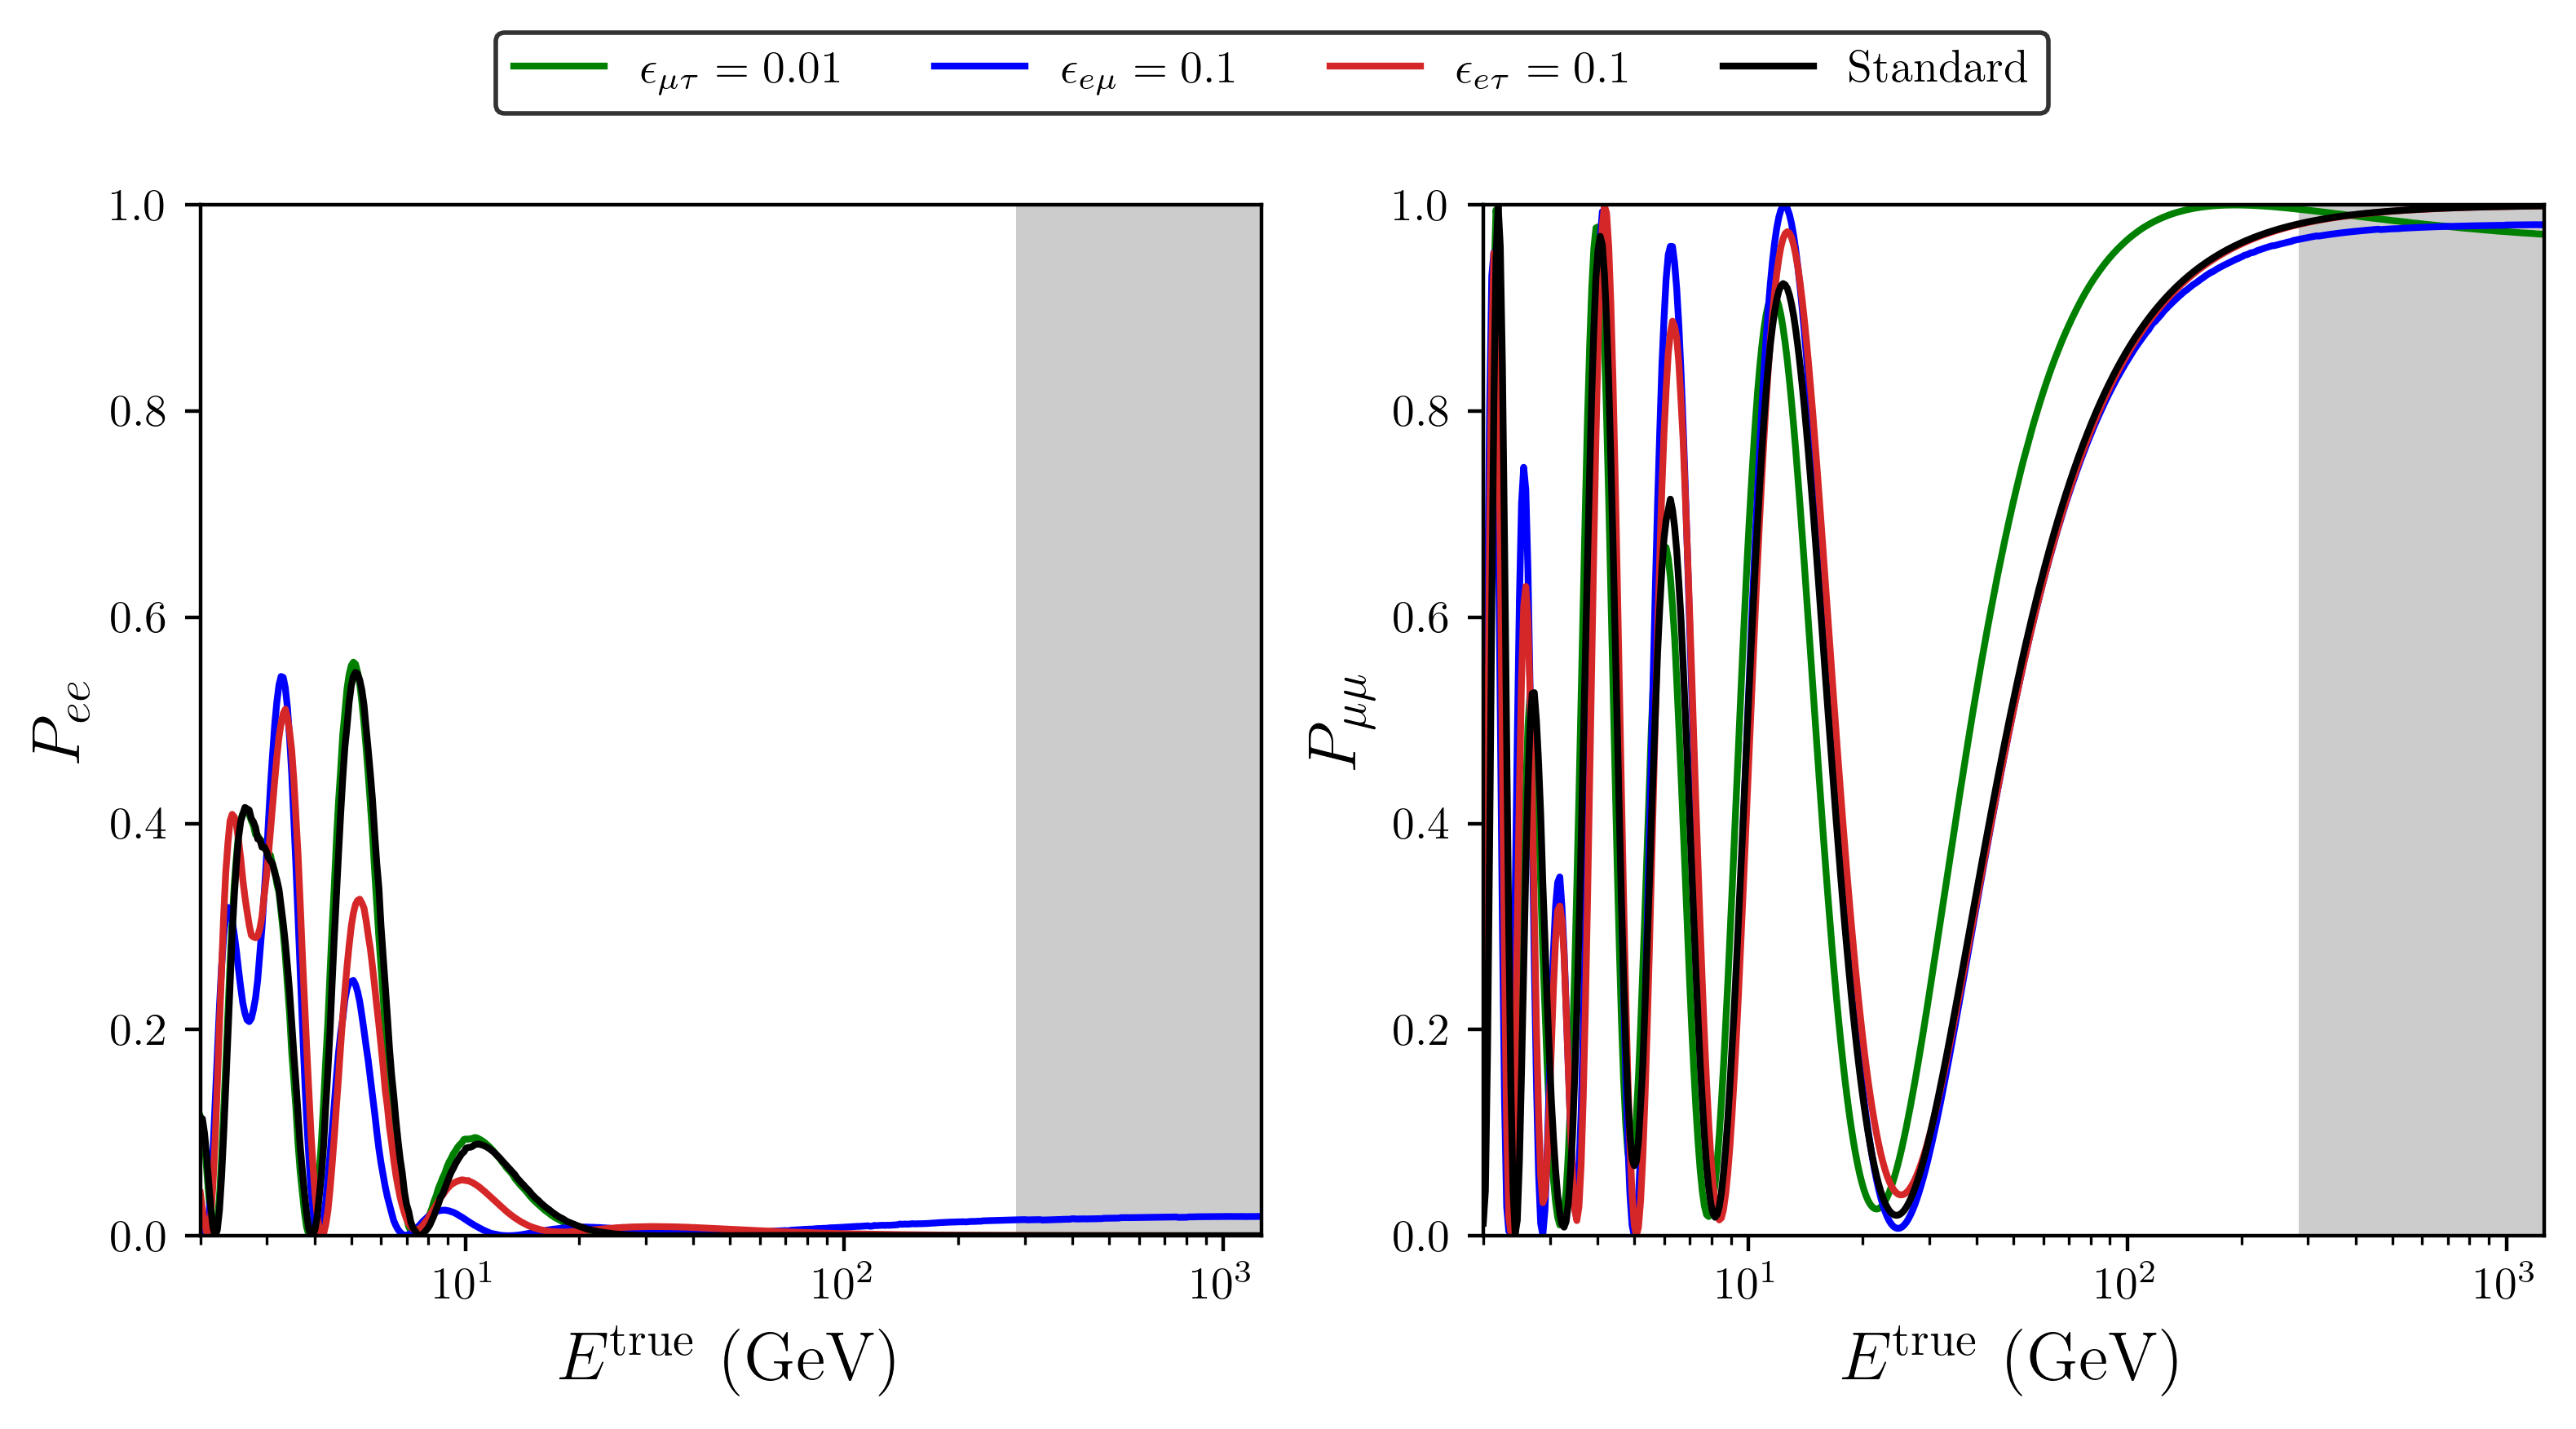

In [106]:
fig, ax = plt.subplots(1,2)

ax[0].plot(all_range, Pe[0,1,:].reshape(-1), label=r'$\epsilon_{\mu\tau} = 0.01$', c = 'green')
ax[0].plot(all_range, Pe[1,1,:].reshape(-1), label=r'$\epsilon_{e\mu} = 0.1$', c='blue')
ax[0].plot(all_range, Pe[2,1,:].reshape(-1), label=r'$\epsilon_{e\tau} = 0.1$', c='tab:red')
ax[0].plot(all_range, Pe_standard[:,1,:].reshape(-1), color='k', label='Standard')
ax[0].axvspan(284, 2e3, facecolor='k', alpha=0.2) # 99%th percentile of IC data
ax[0].set_xscale('log')
_=ax[0].set_xlim((all_range.min(), all_range.max()))
_=ax[0].set_ylim((0,1))
ax[0].set_ylabel(r'$P_{ee}$', fontsize=15)
ax[0].set_xlabel(r'$E^\text{true}$ (GeV)', fontsize=15)
leg=fig.legend(bbox_to_anchor=(0.8,1.1 ), ncol=4)
leg.get_frame().set_edgecolor('k')
ax[1].plot(all_range, Pm[0,1,:].reshape(-1), label=r'$\epsilon_{\mu\tau}$', c = 'green') #Pmm emt
ax[1].plot(all_range, Pm[1,1,:].reshape(-1), label=r'$\epsilon_{e\mu}$', c='blue') #Pmm eem
ax[1].plot(all_range, Pm[2,1,:].reshape(-1), label=r'$\epsilon_{e\tau}$', c='tab:red') #Pmm eet
ax[1].plot(all_range, Pm_standard[:,1,:].reshape(-1), color='k', label='Standard') #Pmm
ax[1].axvspan(284, 2e3, facecolor='k', alpha=0.2) # 99%th percentile of IC data
ax[1].set_xscale('log')
_=ax[1].set_xlim((all_range.min(), all_range.max()))
_=ax[1].set_ylim((0,1))
ax[1].set_ylabel(r'$P_{\mu\mu}$', fontsize=15)
ax[1].set_xlabel(r'$E^\text{true}$ (GeV)', fontsize=15)
plt.tight_layout()

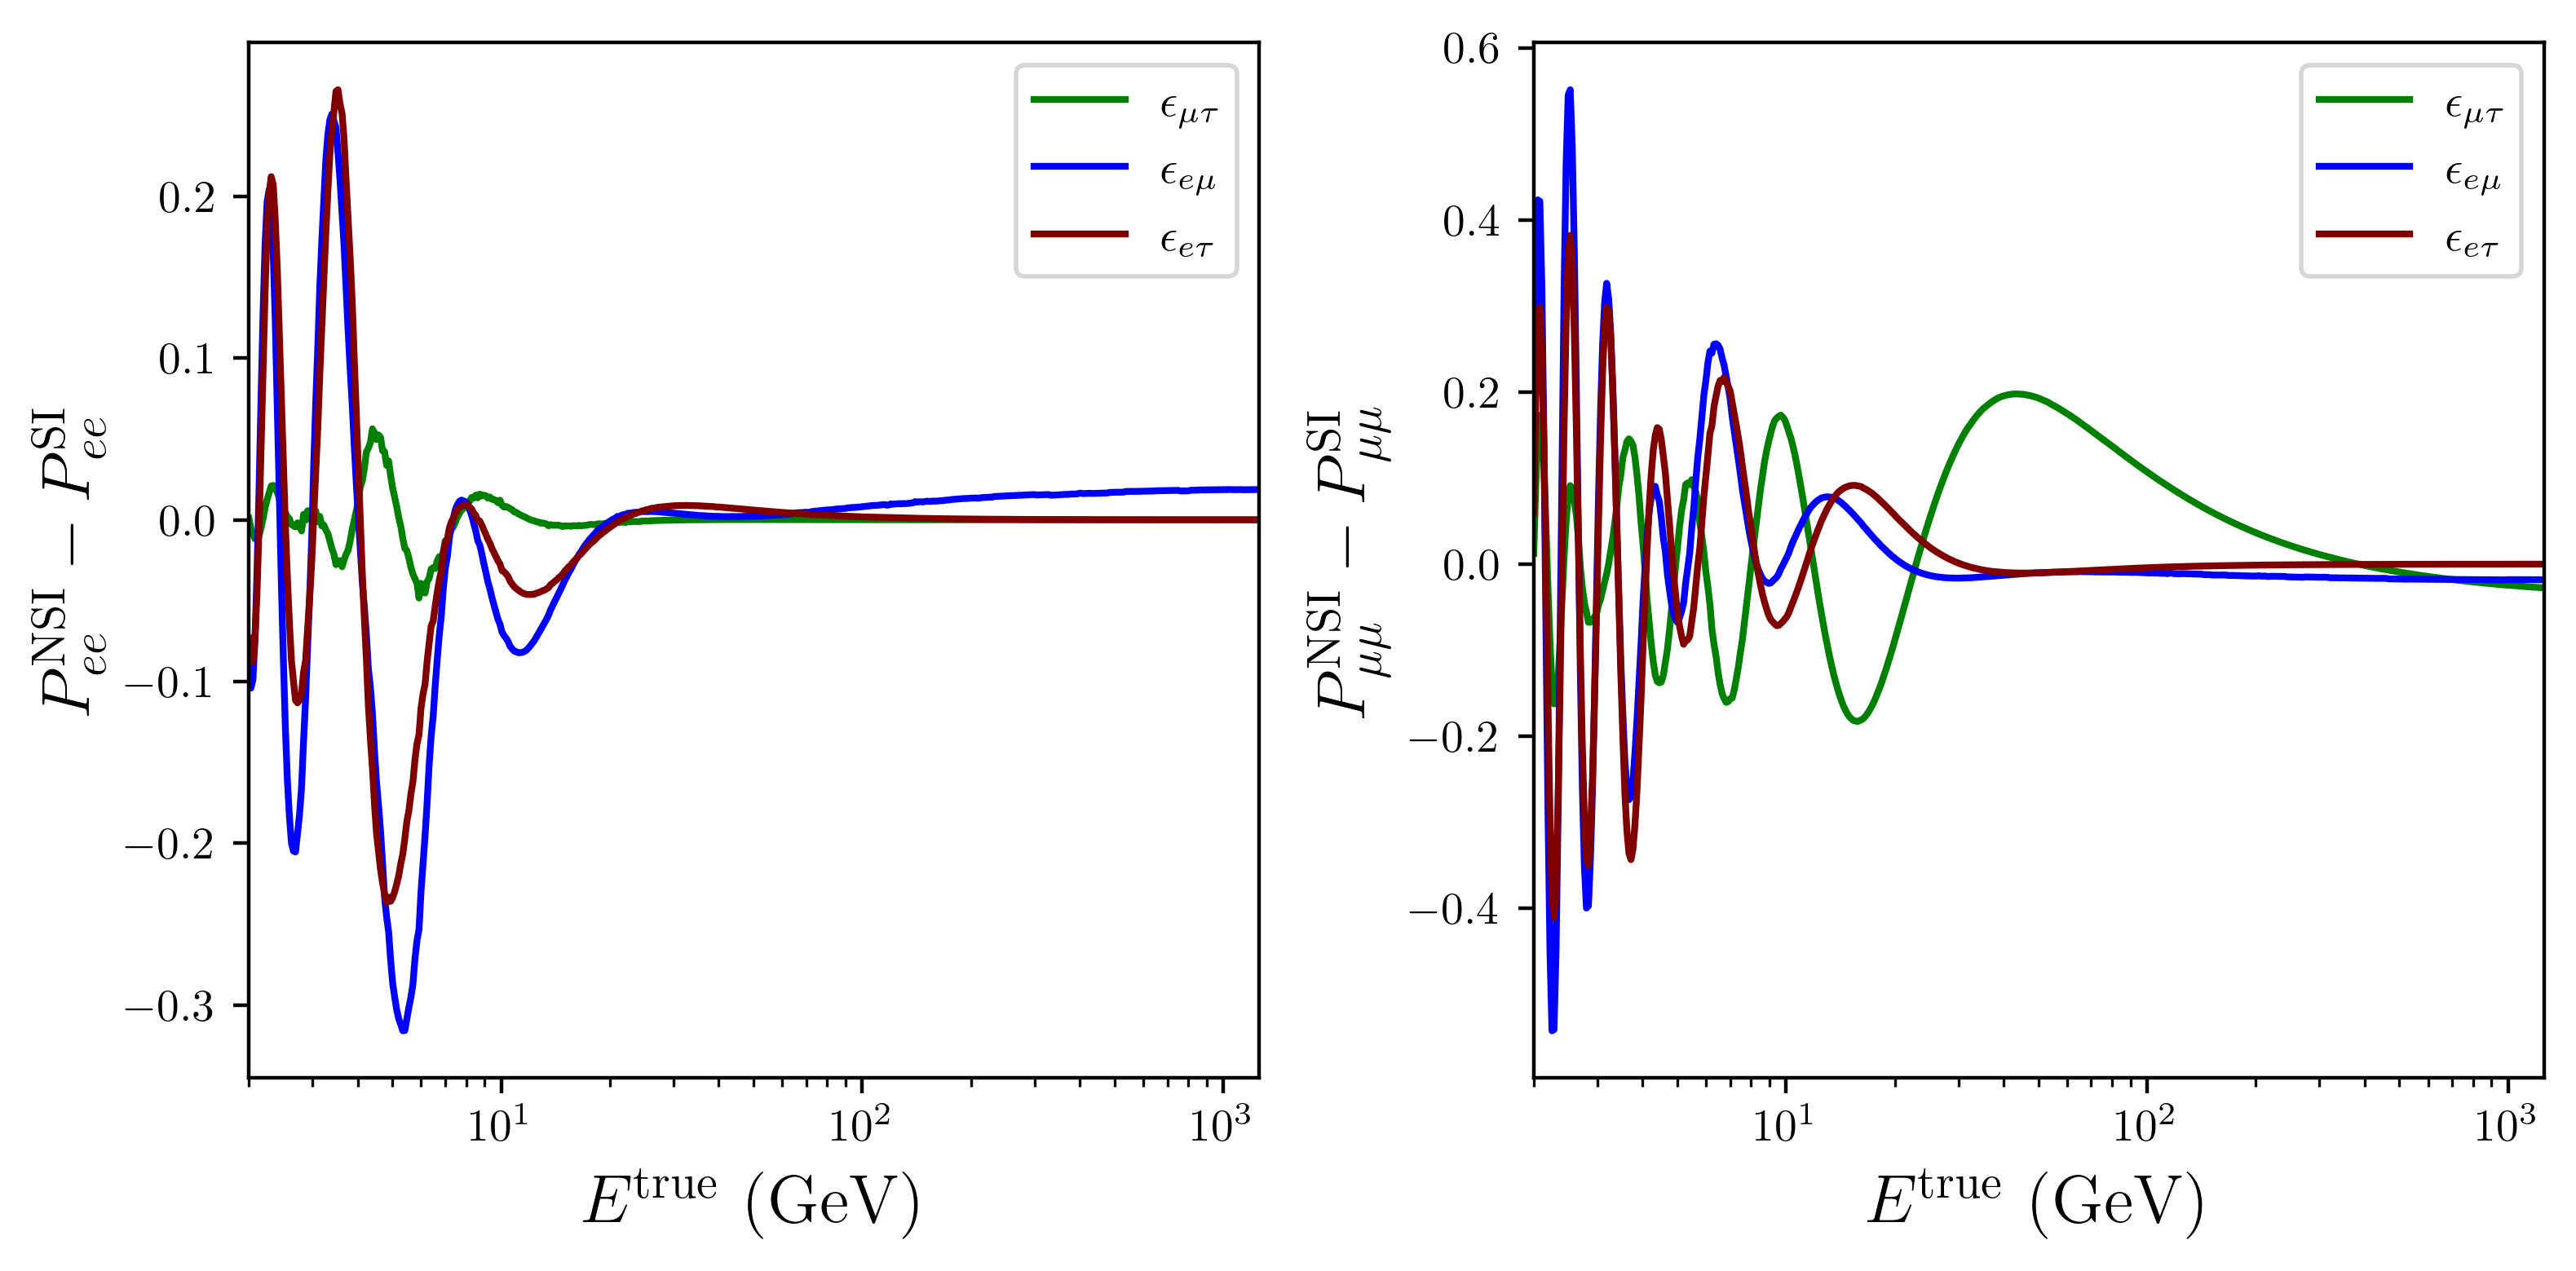

In [73]:
fig, ax = plt.subplots(1,2)

ax[0].plot(all_range, Pe[0,1,:].reshape(-1) - Pe_standard[:,1,:].reshape(-1), label=r'$\epsilon_{\mu\tau}$', c = 'green')
ax[0].plot(all_range, Pe[1,1,:].reshape(-1) - Pe_standard[:,1,:].reshape(-1), label=r'$\epsilon_{e\mu}$', c='blue')
ax[0].plot(all_range, Pe[2,1,:].reshape(-1) - Pe_standard[:,1,:].reshape(-1), label=r'$\epsilon_{e\tau}$', c='tab:red')
ax[0].set_xscale('log')
_=ax[0].set_xlim((all_range.min(), all_range.max()))
#_=ax[0].set_ylim((0,1))
ax[0].set_ylabel(r'$P_{ee}^\text{NSI} - P_{ee}^\text{SI}$', fontsize=15)
ax[0].set_xlabel(r'$E^\text{true}$ (GeV)', fontsize=15)
_=ax[0].legend()

ax[1].plot(all_range, Pm[0,1,:].reshape(-1) - Pm_standard[:,1,:].reshape(-1), label=r'$\epsilon_{\mu\tau}$', c = 'green') #Pmm emt
ax[1].plot(all_range, Pm[1,1,:].reshape(-1) - Pm_standard[:,1,:].reshape(-1), label=r'$\epsilon_{e\mu}$', c='blue') #Pmm eem
ax[1].plot(all_range, Pm[2,1,:].reshape(-1) - Pm_standard[:,1,:].reshape(-1), label=r'$\epsilon_{e\tau}$', c='tab:red') #Pmm eet
ax[1].set_xscale('log')
_=ax[1].set_xlim((all_range.min(), all_range.max()))
#_=ax[1].set_ylim((0,1))
ax[1].set_ylabel(r'$P_{\mu\mu}^\text{NSI} -P_{\mu\mu}^\text{SI}$', fontsize=15)
ax[1].set_xlabel(r'$E^\text{true}$ (GeV)', fontsize=15)
_=ax[1].legend()
plt.tight_layout()

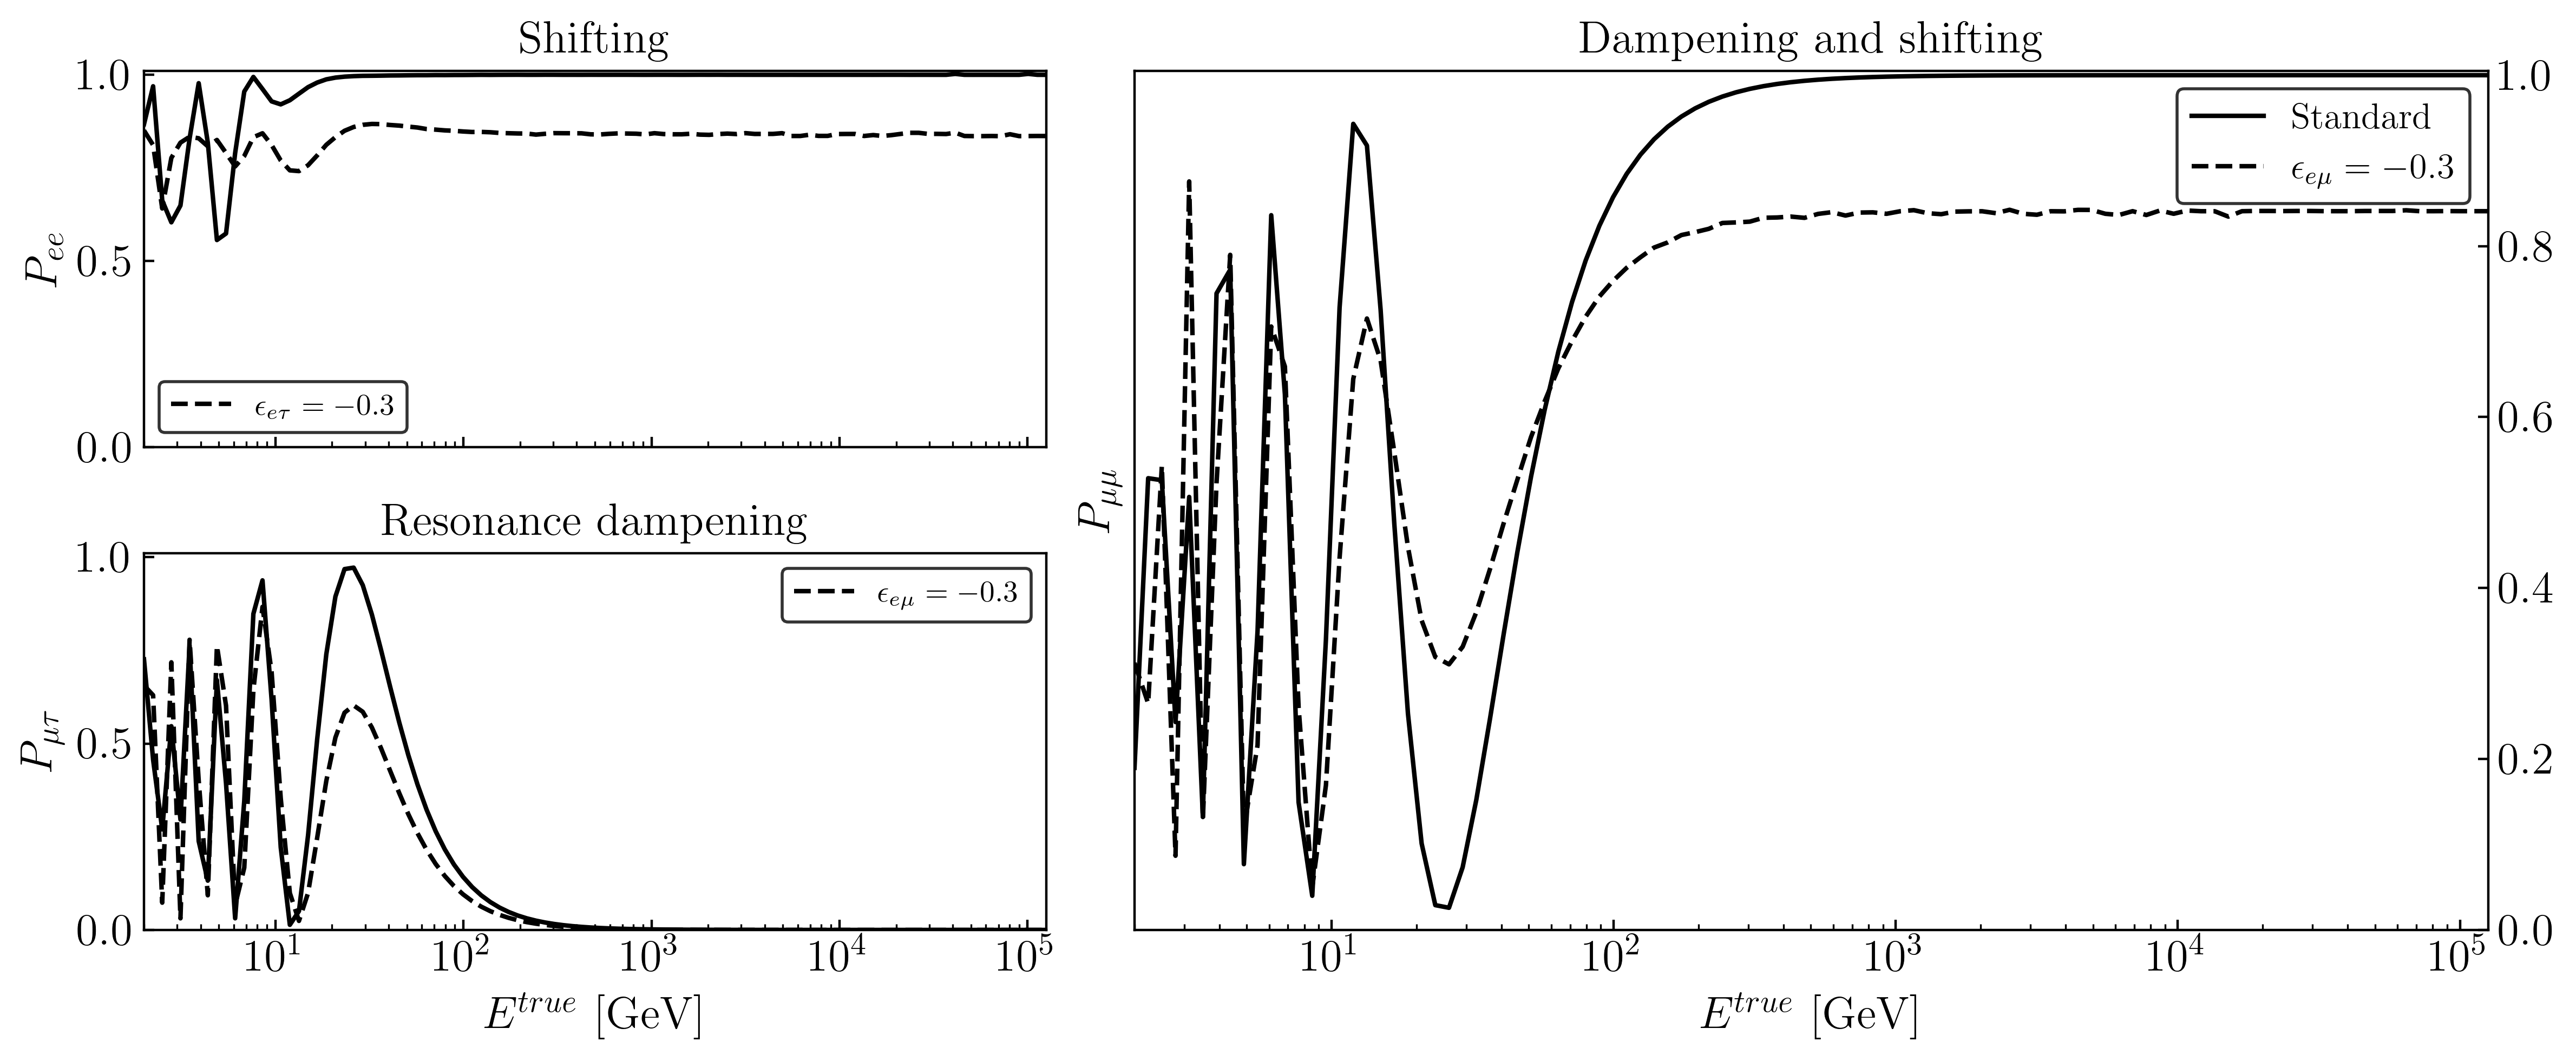

In [75]:
# Setting up the plot surface
plt.rcParams['figure.dpi'] = 400
from matplotlib import gridspec
i_from = 0
i_to = 0
nsi_param = 3
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[1, 1.5], height_ratios=[1, 1])
# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(all_range, (P[i_from,nsi_param,0,i_to] + P_anti[i_from,nsi_param,0,i_to])/2, c='k', ls='dashed', label=r'$\epsilon_{e\tau} = -0.3$')
ax0.plot(all_range, (P[i_from,nsi_param,1,i_to] + P_anti[i_from,nsi_param,1,i_to])/2, c='k', ls='solid')
ax0.set_xscale('log')
ax0.set_ylabel(r'$P_{ee}$', fontsize=15)
ax0.set_xticklabels([])
#ax0.set_ylabel(r'$\nu_{\mu}$ survival', fontsize=15)
ax0.set_title(r'Shifting', fontsize=15)
ax0.set_ylim(0,1.01)
ax0.set_xlim(all_range.min(),all_range.max())
ax0.tick_params(axis='both', direction='in', which='both')
ax0.tick_params(labelsize=15)
# Second axes
ax1 = fig.add_subplot(gs[1, 0])
i_from = 1
i_to = 2
nsi_param = 2
ax1.plot(all_range, (P[i_from,nsi_param,0,i_to] + P_anti[i_from,nsi_param,0,i_to])/2, c='k', ls='dashed', label=r'$\epsilon_{e\mu} = -0.3$')
ax1.plot(all_range, (P[i_from,nsi_param,1,i_to] + P_anti[i_from,nsi_param,1,i_to])/2, c='k', ls='solid')
ax1.set_xscale('log')
ax1.set_ylabel(r'$P_{\mu\tau}$', fontsize=15)
ax1.set_title(r'Resonance dampening', fontsize=15)
ax1.set_xlabel(r'$E^{true}\,\,\mathrm{[GeV]}$', fontsize=15)
ax1.set_ylim(0,1.01)
ax1.set_xlim(all_range.min(),all_range.max())
ax1.tick_params(axis='both', direction='in', which='both')
ax1.tick_params(labelsize=15)
# Third axes
ax2 = fig.add_subplot(gs[:, 1])
i_from = 1
i_to = 1
nsi_param = 2
ax2.plot(all_range, (P[i_from,nsi_param,1,i_to] + P_anti[i_from,nsi_param,1,i_to])/2, c='k', ls='solid', label='Standard')
ax2.plot(all_range, (P[i_from,nsi_param,0,i_to] + P_anti[i_from,nsi_param,0,i_to])/2, c='k', ls='dashed', label=r'$\epsilon_{e\mu} = -0.3$')
ax2.set_xscale('log')
ax2.set_title(r'Dampening and shifting', fontsize=15)
ax2.set_xlabel(r'$E^{true}\,\,\mathrm{[GeV]}$', fontsize=15)
ax2.set_ylim(0,1.005)
ax2.set_xlim(all_range.min(),all_range.max())

ax2.yaxis.tick_right()
ax2.yaxis.set_ticks_position('right')
ax2.set_ylabel(r'$P_{\mu\mu}$', fontsize=15)
ax2.tick_params(axis='both', direction='in', which='both')
ax2.tick_params(labelsize=15)


leg= ax2.legend(fontsize=12)
leg.get_frame().set_edgecolor('k')

leg= ax1.legend(fontsize=10)
leg.get_frame().set_edgecolor('k')

leg= ax0.legend(fontsize=10)
leg.get_frame().set_edgecolor('k')

plt.tight_layout()
#save(fig, 'nsi_probs')

In [4]:
z_range = np.linspace(-1,0,20)
IC_range = np.logspace(np.log10(500),4,10)

#P_emm_IC= [nsi_oscillogram(all_range, z_range, p) for p in emm_params]
#P_emt_IC= [nsi_oscillogram(all_range, z_range, p) for p in emt_params]

#P_emm_DC= [oscillogram(DC_range, z_range, p, nsi=True) for p in emm_params]
#P_emt_DC= [oscillogram(DC_range, z_range, p, nsi=True) for p in emt_params]

Text(0.5, 0.98, '$\\bar{\\nu}_\\mu$ disappearance, DC')

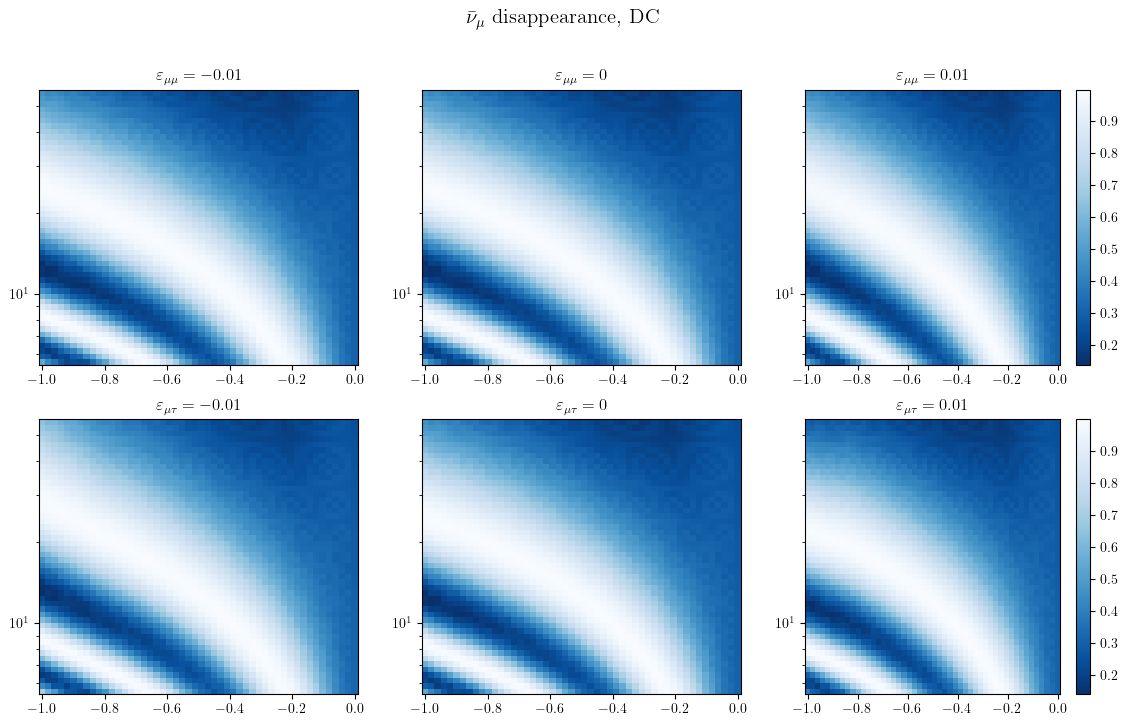

In [51]:
fig, ax = plt.subplots(2,3, figsize=(3.5*4,8))
ax = ax.flatten()
for i in range(3):  
    ax[i].set_title(rf'$\varepsilon_{{\mu\mu}} = {emm_params[i]["e_mm"]}$')
    c=ax[i].pcolormesh(z_range, DC_range,P_emm_DC[i].T,cmap='Blues_r',edgecolor=None, shading = 'auto')
    ax[i].set_yscale('log')

    ax[i+3].set_title(rf'$\varepsilon_{{\mu\tau}} = {emt_params[i]["e_mt"]}$')
    c=ax[i+3].pcolormesh(z_range, DC_range,P_emt_DC[i].T,cmap='Blues_r',edgecolor=None, shading = 'auto')
    ax[i+3].set_yscale('log')

    if i == 2:
        fig.colorbar(c, ax=ax[i])
        fig.colorbar(c, ax=ax[i+3])
fig.suptitle(r'$\bar{\nu}_\mu$ disappearance, DC', fontsize=15)

In [3]:
filename = '../NuFSGenMC_nominal.dat'
df = pd.read_csv(filename, delimiter=' ', names= ['pdg', 'Ereco', 'zreco', 'Etrue', 'ztrue', 'mcweight', 'flux_pion', 'flux_kaon'], skiprows=12)
df.query('Ereco == Ereco.min()')['Etrue'].quantile(0.1)
Ebins = 500*10**np.linspace(0,1.3,14)
df['Ebin'] = pd.cut(df.Ereco,Ebins,labels=False)
#df = df.groupby('Ebin').
#df.query('Ebin == 0.0').Etrue.quantile(0.1)
from IC.processer import get_Etrue, get_interpolators
_,_,model = get_interpolators()
get_Etrue(model, 3,0.995,0.995,E_index=0)[0][0]

(array([ 284.276,  745.293, 1953.95 ]),
 array([6.569, 6.604, 6.663]),
 array([0.357, 0.356, 0.355]))

In [16]:
get_Etrue(model, 3,0.995,0.995,E_index=0)[0][0]

284.276466762975

In [18]:
get_Etrue(model, 3,0.995,0.995,E_index=12)[0][2]

103821.37459903302

In [4]:
get_Etrue(model, 3,0.99,0.99,E_index=0)

(array([ 310.745,  745.443, 1788.238]),
 array([6.569, 6.604, 6.663]),
 array([0.357, 0.356, 0.355]))

In [4]:
filename = '../NuFSGenMC_nominal.dat'
df = pd.read_csv(filename, delimiter=' ', names= ['pdg', 'Ereco', 'zreco', 'Etrue', 'ztrue', 'mcweight', 'flux_pion', 'flux_kaon'], skiprows=12)
df.sample(10).to_latex('t.tex')

In [10]:
from DC.importer import MC2018_DC
#MC2018_DC().query('pid==0').query('abs(pdg) != 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.01)
MC2018_DC().query('pid==0').query('abs(pdg) != 14').query('reco_energy == reco_energy.max()')['true_energy'].quantile(0.005)

13.164715576171876

In [83]:
z_range = np.linspace(-1,0,500)
IC_range = np.logspace(np.log10(284),np.log10(103821),500) 
DC_range = np.logspace(np.log10(1.9),np.log10(210),500)
#flux_emt_IC_track= np.array(nsi_flux_oscillogram(all_range, z_range, emt_params[0]))
#flux_emt_IC_cascade= np.array(nsi_flux_oscillogram(all_range, z_range, emt_params[0]))
flux_emt_IC_track = pickle.load(open('./pre_computed/flux_emt_IC_track.p','rb'))
flux_emt_DC_track = pickle.load(open('./pre_computed/flux_emt_DC_track.p','rb'))
#flux_emt_IC_cascade = pickle.load(open('./pre_computed/P_emt_IC_cascade.p','rb'))

In [11]:
MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.005)

1.9329288434982304

In [14]:
MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.005)

1.9329288434982304

In [15]:
MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.max()')['true_energy'].quantile(1-0.005)

210.22446929931684

In [9]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)


def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-0.6, vmax=1.6)
        fig.colorbar(psm, ax=ax)
    plt.show()

In [10]:
track_cmap_dict = {'red':  ((0.0, 1.0, 10),
                   (0.32, 1.0, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

          'green': ((0.0, 0.0, 0.3),
                    (0.32, 1.0, 1.0),
                    (0.75, 0.1, 0.1),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 0.6),
                    (0.3, 1.0, 1.0),
                    (0.75, 0.1, 0.1),
                    (1.0, 0.0, 0.0))
          }

In [99]:
from matplotlib.colors import CenteredNorm
from matplotlib.colors import LinearSegmentedColormap
dc_dict = {'red':  ((0.0, 0.0, 0),
                   (0.32, 1.0, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

          'green': ((0.0, 0.1, 0.2),
                    (0.32, 1.0, 1.0),
                    (0.75, 0.2, 0.2),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.1, 0.5),
                    (0.32, 1.0, 1.0),
                    (0.75, 0.0, 0.0),
                    (1.0, 0.0, 0.0))
          }
ic_dict = {'red':  ((0.0, 0.0, 0),
                   (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.1, 0.2),
                    (1.0, 1.0, 1.0)),

          'blue':  ((0.0, 0.1, 0.5),
                    (1.0, 1.0, 1.0))
          }
ic_cmap = LinearSegmentedColormap('BlueRed1', ic_dict)
dc_cmap = LinearSegmentedColormap('BlueRed1', dc_dict)
plot_examples([viridis, track_cmap])

NameError: name 'plot_examples' is not defined

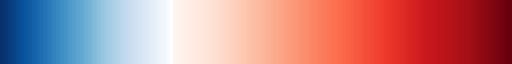

In [12]:
bottom = cm.get_cmap('Blues_r', 64)
top = cm.get_cmap('Reds', 128)

newcolors = np.vstack((bottom(np.linspace(0, 1, 64)),
                        (1,1,1,1),
                       top(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
newcmp

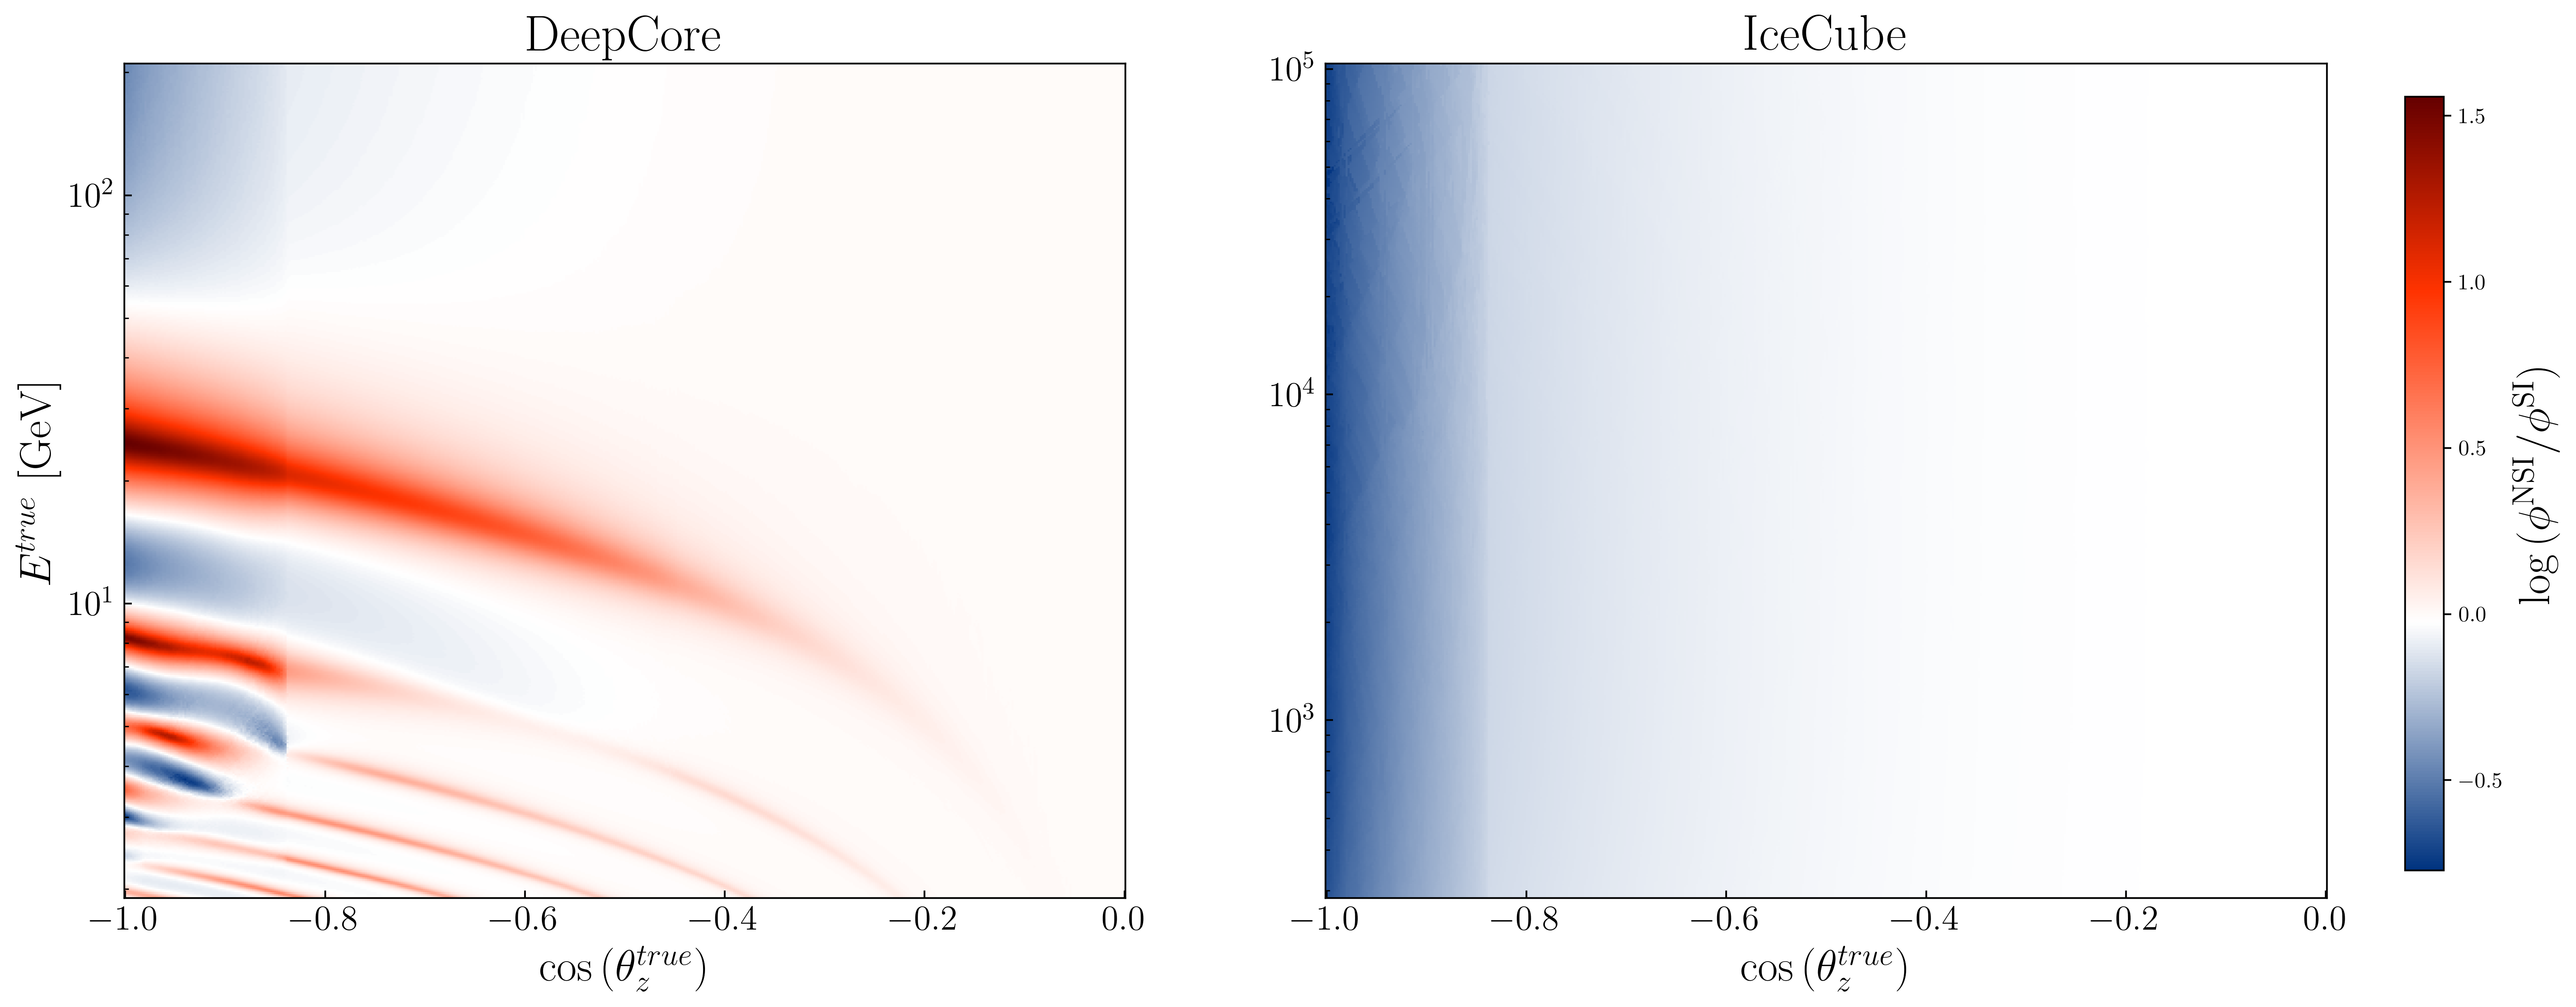

In [103]:
fig, ax = plt.subplots(1,2, figsize=(9*2,7), squeeze=True)

c1=ax[0].pcolormesh(z_range, DC_range,np.log10(flux_emt_DC_track[1].T),cmap=dc_cmap,edgecolor=None, shading = 'auto', rasterized=True)# vmin=-1,vmax=3)#) norm = CenteredNorm(0),
c2=ax[1].pcolormesh(z_range, IC_range,np.log10(flux_emt_IC_track[1].T),cmap=ic_cmap, edgecolor=None, shading = 'auto', rasterized=True)# vmin=-1,vmax=3)# 

#ax[0].set_title(r'$\nu_{e/\tau} + \bar\nu_{e/\tau}$ flux ratio', fontsize=20)
#ax[1].set_title(r'$\nu_\mu + \bar\nu_\mu$ flux ratio', fontsize=20)
ax[0].set_title(r'DeepCore', fontsize=23)
ax[1].set_title(r'IceCube', fontsize=23)

ax[0].set_xlabel(r'$\cos{(\theta^{true}_z)}$', fontsize=20)
ax[1].set_xlabel(r'$\cos{(\theta^{true}_z)}$', fontsize=20)
ax[0].tick_params(labelsize=16, direction='in', which='both', axis='both')
ax[1].tick_params(labelsize=16, direction='in', which='both', axis='both')
ax[0].set_ylabel(r'$E^{true}\,\,\mathrm{[GeV]}$', fontsize=20)
ax[0].set_yscale('log')
ax[1].set_yscale('log')

cax = fig.add_axes([0.8, 0.15, 0.15, 0.7])
cbar = plt.colorbar(c1, ax=cax, pad=0.35)
cbar.set_label(r'$\log{(\phi^\text{NSI}/\phi^\text{SI})}$', fontsize=20)
_=cax.axis('off')

ax[0].set_ylim(1.9,210)
ax[1].set_ylim(284,103821)
#plt.suptitle(r'$(\phi_{\nu_\mu}^{NSI} + \phi_{\bar\nu_\mu}^{NSI})/(\phi_{\nu_\mu}^{SI} + \phi_{\bar\nu_\mu}^{SI})$', fontsize=25)

plt.savefig('./article/figures/flux_ratio.pdf', bbox_inches="tight")